In [1]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import os
import numpy as np
import seaborn as sns
from matplotlib.patches import Patch
import matplotlib.ticker as tck

2024-04-03 08:31:38.803470: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-03 08:31:38.845616: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 08:31:39.481164: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
def get_scalar_run_tensorboard(tag, filepath):
    values,steps = [],[]
    for e in tf.compat.v1.train.summary_iterator(filepath):
        if len(e.summary.value) > 0:
            if e.summary.value[0].tag == tag:
                value, step = (e.summary.value[0].simple_value, e.step)
                values.append(value)
                steps.append(step)
    return values,steps

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


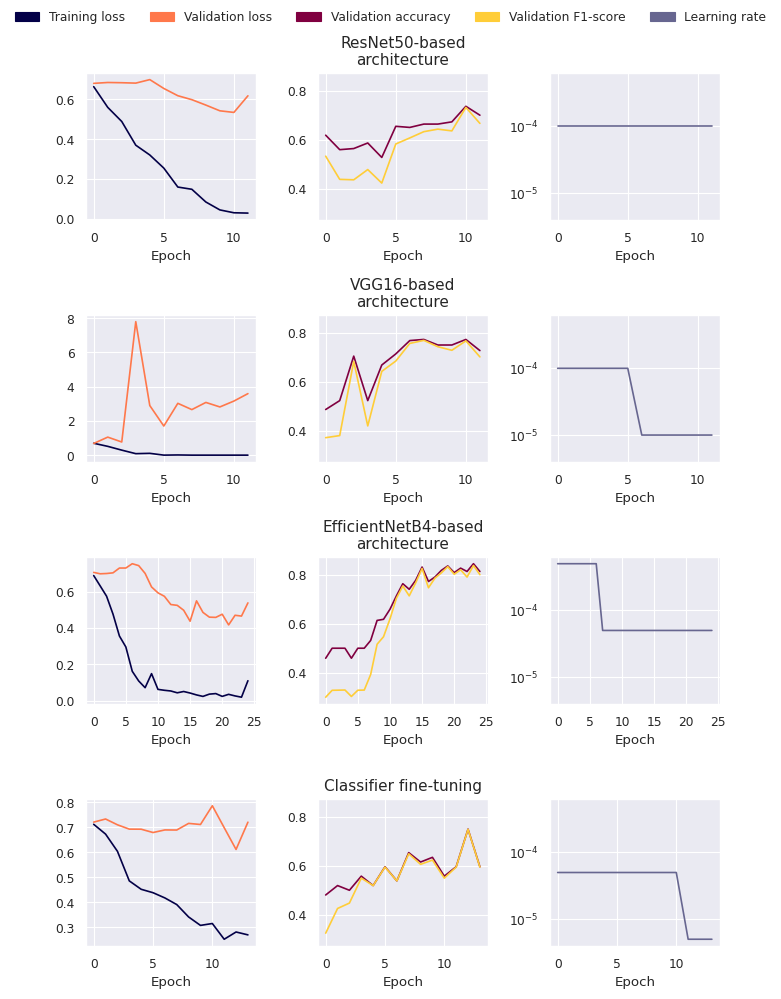

In [4]:
sns.set_theme("paper")
models = ["ResNet_1e-4_2,3_frozen", "vgg_lr=1e-4", "effnet_3:5_frozen_lr=1e-3", "tumor_stage_classifier"]
palette = {"Training loss": "#030047",	"Validation loss":"#FF784B", "Validation accuracy":"#800040", "Validation F1-score":"#FFCD38", "Learning rate": "#676690"}

f, axs = plt.subplots(len(models), 3, figsize=(7, 10))
for j in range(1, len(models)):
    axs[j, -1].sharey(axs[0, -1])
    axs[j, 1].sharey(axs[0, 1])

for j, m in enumerate(models):
    run = os.listdir(f"../data/models/{m}")[-1]
    fp = os.path.join(f"../data/models/{m}", run)
    for i, observed_value in enumerate(["Train loss", "Val loss", "Val Accuracy", "Val F1-score", "LR"]):
        y, x = get_scalar_run_tensorboard(observed_value, fp)
        if "resnet" in m.lower():
            y = y[:12]
            x = x[:12]
            if i // 2 == 1:
                axs[j, i // 2].set_title("\nResNet50-based\narchitecture", fontsize=11)
        elif "vgg" in m.lower():
            y = y[:12]
            x = x[:12]
            if i // 2 == 1:
                axs[j, i // 2].set_title("VGG16-based\narchitecture", fontsize=11)
        elif "effnet" in m.lower():
            y = y[:25]
            x = x[:25]
            if i // 2 == 1:
                axs[j, i // 2].set_title("EfficientNetB4-based\narchitecture", fontsize=11)
        else:
            y = y[:14]
            x = x[:14]
            if i // 2 == 1:
                axs[j, i // 2].set_title("Classifier fine-tuning", fontsize=11)
        axs[j, i // 2].set_xlabel("Epoch")
        axs[j, i // 2].plot(x, y, label=list(palette.keys())[i], c=palette[list(palette.keys())[i]])
        axs[j, i // 2].xaxis.set_major_locator(tck.MultipleLocator(5))

        if i == 4:
            #axs[j, i // 2].ticklabel_format(axis="y", style="sci", scilimits=(0,0))
            axs[j, i // 2].set_yscale("log")

legend_handles = [Patch(color=color, label=key) for key, color in palette.items()]
plt.figlegend(handles=legend_handles, loc="upper center", ncol=5, frameon=False)

plt.tight_layout()
plt.savefig("../result_plots/training_process.pdf")